In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as la

In [2]:
x=np.random.normal(0,1,100)
y=2*x+np.random.normal(0,1,100)

Los patrones de un problema bivariado son vectores (se reduce la dimensionalidad). Los pasos son exactamente los mismos

# Matriz de datos

In [10]:
A=np.c_[x,y]
A2=np.c_[(x-np.mean(x))/np.std(x),(y-np.mean(y))/np.std(y)]

In [25]:
## Estas son las matrices de covarianza
B=1/(len(x)-1)*np.dot(A,A.T)
B_alternativa=1/(len(x)-1)*np.dot(A.T,A)

## Estas son las matrices de correlaciones
B_2=1/(len(x))*np.dot(A2,A2.T) ## Hay que acotar que es importante la dirección en la que se realiza la desviación
B_alternativa_2=1/(len(x))*np.dot(A2.T,A2)


[2xn][nx2]=[2x2] Correlación temporal distribuida el espacio, resumo el tiempo (la dimensión del tiempo se borra)

[nx2][2xn]=[nxn] Correlación espacial distribuida el tiempo

La dimensión de B_alternativa es {{B_alternativa.shape}}, es decir, obedece a una correlación temporal en el espacio.

Un análisis con correlación, cada uno tiene igual importancia. Un análisis de covarianza si se ve influenciada por la variabilidad.

Aunque la matriz de covarianza ya me habla del grado de variabilidad, la matriz de correlación ayuda para que, al adimensionalizar todo, se pueda comparar o encontrar los modos de oscilación y después escalar con un factor de corrección

Para la matriz de correlación espacial en el tiempo tiene problemas con la dirección en la que se escala e implica que existan diversas variables

- Los vectores propios de la matriz B están distribuidas en el espacio (Esto corresponde a los modos de oscilación, patrones espaciales)
- Los vectores propios de la matriz B_alternativa están distribuidas en el tiempo (Esto corresponde las trazas en el tiempo, componentes principales)


In [35]:
val,vec=la.eig(B)
val_alternativa,vec_alternativa=la.eig(B_alternativa)

val_corr_alternativa,vec_corr_alternativa=la.eig(B_alternativa_2)

In [38]:
a=np.sum(val)
b=np.sum(np.diag(B_alternativa))

In [39]:
a,b

((6.472782518092113+0j), 6.472782518092108)

(-2.62694633098302, 3.0318798456108516, -5.265479989347723, 6.671843220583462)

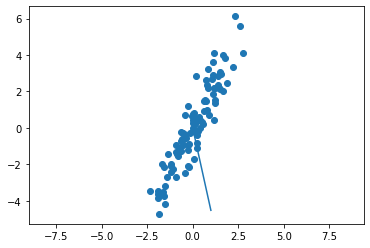

In [46]:
plt.figure()
xx1=np.array([0,vec_alternativa[0][0]])
xx2=np.array([0,vec_alternativa[0][0]])
plt.scatter(x,y)
plt.plot(xx1*5)
plt.axis("equal")

El vector en dirección de la tendencia es el que indica la mayor parte de la varianza y el otro aparece por obligación de ortogonalidad.

## Probando el segundo método

Este método permite la obtención directa de las componentes principales y de los modos de oscilación, es decir los patrones espacio-temporales

In [49]:
U,S,Vh=np.linalg.svd(A)

In [50]:
U.shape,S.shape,Vh.shape

((100, 100), (2,), (2, 2))